# The aim of this project is to predict weather condition with machine learning.
# The dataset is at: https://www.ncdc.noaa.gov/cdo-web/search, with the following parameters:
    # Daily summaries;
    # From 1960-01-01 to 2022-02-05;
    # Search for Stations;
    # and in the search term box: Oakland airport location.
##### Finally at the website, the .csv import was done.

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
reg = Ridge(alpha=.1)

In [2]:
weather = pd.read_csv("C://Users//johng//Desktop//data//weather.csv", index_col= "DATE", encoding='utf-8')

In [3]:
weather

,STATION,NAME,ACMH,ACSH,AWND,DAPR,FMTM,FRGT,MDPR,PGTM,...,WT01,WT02,WT03,WT04,WT05,WT07,WT08,WT09,WT16,WT18
DATE,,,,,,,,,,,,,,,,,,,,,
1960-01-01,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-01-02,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
1960-01-03,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-01-04,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-01-05,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-01,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,8.95,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-02-02,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,12.30,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-02-03,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,3.80,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
weather.apply(pd.isnull).sum() / weather.shape[0]

STATION    0.000000
NAME       0.000000
ACMH       0.653545
ACSH       0.653545
AWND       0.522113
DAPR       0.999526
FMTM       0.870168
FRGT       0.999881
MDPR       0.999526
PGTM       0.495435
PRCP       0.016659
SNOW       0.325350
SNWD       0.317999
TAVG       0.879239
TMAX       0.000534
TMIN       0.000593
TSUN       0.931764
WDF1       0.653545
WDF2       0.522054
WDF5       0.527211
WDFG       0.747036
WSF1       0.653545
WSF2       0.521994
WSF5       0.527211
WSFG       0.747036
WT01       0.779701
WT02       0.980258
WT03       0.992945
WT04       0.999763
WT05       0.998340
WT07       0.999881
WT08       0.810292
WT09       0.999881
WT16       0.884100
WT18       0.999822
dtype: float64

# According to the documentation these are the core columns of the dataframe:
    PRCP
    SNOW
    SNWD
    TMAX
    TMIN

In [5]:
core_weather = weather[["PRCP", "SNOW", "SNWD", "TMAX", "TMIN"]].copy()

#### Renaming the columns:

In [6]:
core_weather.columns = ["precip", "snow", "snow_depth", "temp_max", "temp_min"]

In [7]:
core_weather

,precip,snow,snow_depth,temp_max,temp_min
DATE,,,,,
1960-01-01,0.0,0.0,0.0,49.0,30.0
1960-01-02,0.0,0.0,0.0,49.0,29.0
1960-01-03,0.0,0.0,0.0,54.0,35.0
1960-01-04,0.0,0.0,0.0,54.0,36.0
1960-01-05,0.0,0.0,0.0,55.0,33.0
...,...,...,...,...,...
2022-02-01,0.0,NaN,NaN,63.0,39.0
2022-02-02,0.0,NaN,NaN,64.0,43.0
2022-02-03,0.0,NaN,NaN,60.0,37.0


In [8]:
core_weather.apply(pd.isnull).sum() / core_weather.shape[0]

precip        0.016659
snow          0.325350
snow_depth    0.317999
temp_max      0.000534
temp_min      0.000593
dtype: float64

In [9]:
core_weather["snow"].value_counts(dropna=False)

0.0    11379
NaN     5488
1.0        1
Name: snow, dtype: int64

#### This indicates that the column "snow" has only one value which is not enough for the machine learning model:

In [10]:
del core_weather["snow"]

In [11]:
core_weather["snow_depth"].value_counts(dropna=False)

0.0    11504
NaN     5364
Name: snow_depth, dtype: int64

#### This indicates that the column "snow_depth" has no value for the machine learning model:

In [12]:
del core_weather["snow_depth"]

In [13]:
core_weather[pd.isnull(core_weather["precip"])]

,precip,temp_max,temp_min
DATE,,,
1983-10-29,NaN,67.0,57.0
1983-10-30,NaN,70.0,63.0
1983-10-31,NaN,69.0,61.0
1983-11-12,NaN,63.0,55.0
1983-11-13,NaN,60.0,50.0
...,...,...,...
2013-12-15,NaN,58.0,33.0
2016-05-01,NaN,80.0,55.0
2016-05-02,NaN,68.0,53.0


#### What happened between two dates?

In [14]:
core_weather.loc["1983-10-20":"1983-11-05", :]

,precip,temp_max,temp_min
DATE,,,
1983-10-20,0.00,73.0,52.0
1983-10-21,0.00,70.0,50.0
1983-10-22,0.00,70.0,50.0
1983-10-23,0.00,69.0,60.0
1983-10-24,0.00,73.0,58.0
1983-10-25,0.00,75.0,53.0
1983-10-26,0.00,79.0,53.0
1983-10-27,0.00,82.0,56.0
1983-10-28,0.00,74.0,56.0


In [15]:
core_weather["precip"].value_counts(dropna=False)

0.00    13673
0.01      438
NaN       281
0.02      199
0.03      122
        ...  
2.36        1
1.38        1
1.23        1
1.21        1
1.02        1
Name: precip, Length: 177, dtype: int64

#### The vast majority of days had no precipitation

In [16]:
core_weather["precip"] = core_weather["precip"].fillna(0)

#### na values is "temp_max" column:

In [17]:
core_weather[pd.isnull(core_weather["temp_max"])]

,precip,temp_max,temp_min
DATE,,,
2004-11-20,0.0,NaN,NaN
2013-06-16,0.0,NaN,NaN
2019-04-18,0.0,NaN,50.0
2019-04-21,0.0,NaN,52.0
2019-04-22,0.0,NaN,50.0
2020-08-29,0.0,NaN,NaN
2020-09-08,0.0,NaN,NaN
2020-09-09,0.0,NaN,NaN
2021-10-31,0.0,NaN,56.0


#### fill na with foward fill method:

In [18]:
core_weather = core_weather.fillna(method="ffill")

# Determine columns date type:

In [19]:
core_weather.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16868 entries, 1960-01-01 to 2022-02-05
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   precip    16868 non-null  float64
 1   temp_max  16868 non-null  float64
 2   temp_min  16868 non-null  float64
dtypes: float64(3)
memory usage: 1.0+ MB


# Convert datetime index:

In [20]:
core_weather.index

Index(['1960-01-01', '1960-01-02', '1960-01-03', '1960-01-04', '1960-01-05',
       '1960-01-06', '1960-01-07', '1960-01-08', '1960-01-09', '1960-01-10',
       ...
       '2022-01-27', '2022-01-28', '2022-01-29', '2022-01-30', '2022-01-31',
       '2022-02-01', '2022-02-02', '2022-02-03', '2022-02-04', '2022-02-05'],
      dtype='object', name='DATE', length=16868)

In [21]:
core_weather.index = pd.to_datetime(core_weather.index)

# Analysing if we have data with 9999 (9 means an absent data on that day):

In [22]:
core_weather.apply(lambda x: (x==9999).sum())

precip      0
temp_max    0
temp_min    0
dtype: int64

<AxesSubplot:xlabel='DATE'>

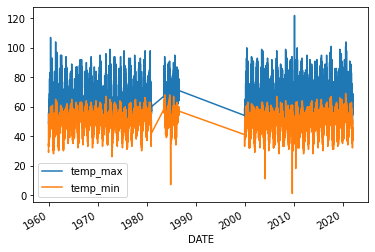

In [23]:
core_weather[["temp_max", "temp_min"]].plot()

In [24]:
core_weather.index.year.value_counts().sort_index()

1960    366
1961    365
1962    365
1963    365
1964    366
1965    365
1966    365
1967    365
1968    366
1969    365
1970    365
1971    365
1972    366
1973    365
1974    365
1975    365
1976    366
1977    365
1978    365
1979    365
1980    366
1983    184
1984    366
1985    365
1986    212
2000    365
2001    365
2002    365
2003    365
2004    366
2005    365
2006    365
2007    365
2008    366
2009    365
2010    365
2011    365
2012    365
2013    365
2014    365
2015    365
2016    366
2017    365
2018    365
2019    365
2020    366
2021    365
2022     36
Name: DATE, dtype: int64

In [25]:
core_weather.groupby(core_weather.index.year).sum()["precip"]

DATE
1960    14.01
1961    13.87
1962    22.47
1963    19.11
1964    16.83
1965    16.32
1966    13.11
1967    23.98
1968    17.19
1969    25.70
1970    25.31
1971    10.61
1972    16.27
1973    29.37
1974    16.87
1975    17.54
1976     8.64
1977    11.70
1978    22.57
1979    23.79
1980    13.58
1983     7.13
1984    16.03
1985     8.50
1986     0.00
2000    21.09
2001    22.84
2002    19.12
2003    11.37
2004    12.97
2005    27.37
2006    22.79
2007    12.79
2008    13.86
2009    14.57
2010    22.67
2011    16.06
2012    22.93
2013     4.89
2014    19.62
2015     8.58
2016    19.77
2017    23.34
2018    16.82
2019    20.00
2020     6.42
2021    20.82
2022     0.25
Name: precip, dtype: float64

# Setup a target:

In [26]:
core_weather["target"] = core_weather.shift(-1)["temp_max"]

In [27]:
core_weather

,precip,temp_max,temp_min,target
DATE,,,,
1960-01-01,0.0,49.0,30.0,49.0
1960-01-02,0.0,49.0,29.0,54.0
1960-01-03,0.0,54.0,35.0,54.0
1960-01-04,0.0,54.0,36.0,55.0
1960-01-05,0.0,55.0,33.0,53.0
...,...,...,...,...
2022-02-01,0.0,63.0,39.0,64.0
2022-02-02,0.0,64.0,43.0,60.0
2022-02-03,0.0,60.0,37.0,62.0


In [28]:
core_weather = core_weather.iloc[:-1,:].copy()

In [29]:
predictors = ["precip", "temp_max", "temp_min"]

In [30]:
train = core_weather.loc[:"2020-12-31"]

In [31]:
test = core_weather.loc["2020-01-01":]

In [32]:
reg.fit(train[predictors], train["target"])

Ridge(alpha=0.1)

In [33]:
predictions = reg.predict(test[predictors])

In [34]:
mean_absolute_error(test["target"], predictions)

3.523638685023199

# We are off 3.52°

In [35]:
combined = pd.concat((test["target"], pd.Series(predictions, index=test.index)), axis=1)
combined.columns = ["actual", "predictions"]

In [36]:
combined

,actual,predictions
DATE,,
2020-01-01,60.0,59.983338
2020-01-02,61.0,60.165405
2020-01-03,61.0,60.527162
2020-01-04,60.0,61.223851
2020-01-05,58.0,59.446643
...,...,...
2022-01-31,63.0,58.902819
2022-02-01,64.0,61.789748
2022-02-02,60.0,63.229649


<AxesSubplot:xlabel='DATE'>

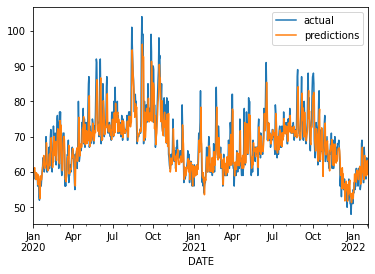

In [37]:
combined.plot()

In [38]:
def create_predictions(predictors, core_weather, reg):
    train = core_weather.loc[:"2020-12-31"]
    test = core_weather.loc["2020-01-01":]
    reg.fit(train[predictors], train["target"])
    predictions = reg.predict(test[predictors])
    error = mean_absolute_error(test["target"], predictions)
    combined = pd.concat((test["target"], pd.Series(predictions, index=test.index)), axis=1)
    combined.columns = ["actual", "predictions"]
    return error, combined   

# Adding more columns in the prediction model:

In [39]:
# mean of previous 30 days:
core_weather["month_max"] = core_weather["temp_max"].rolling(30).mean()

In [40]:
core_weather

,precip,temp_max,temp_min,target,month_max
DATE,,,,,
1960-01-01,0.0,49.0,30.0,49.0,NaN
1960-01-02,0.0,49.0,29.0,54.0,NaN
1960-01-03,0.0,54.0,35.0,54.0,NaN
1960-01-04,0.0,54.0,36.0,55.0,NaN
1960-01-05,0.0,55.0,33.0,53.0,NaN
...,...,...,...,...,...
2022-01-31,0.0,58.0,43.0,63.0,59.266667
2022-02-01,0.0,63.0,39.0,64.0,59.533333
2022-02-02,0.0,64.0,43.0,60.0,59.866667


In [41]:
core_weather["month_day_max"] = core_weather["month_max"] / core_weather["temp_max"]

In [42]:
core_weather["max_min"] = core_weather["temp_max"] / core_weather["temp_min"]

In [43]:
predictors = ["precip", "temp_max", "temp_min", "month_max", "month_day_max", "max_min"]

In [44]:
core_weather = core_weather.iloc[30:,:].copy()

In [45]:
error, combined = create_predictions(predictors, core_weather, reg)

In [46]:
error

3.469886393764199

# Off by 3.47° now.

In [47]:
core_weather["montly_avg"] = core_weather["temp_max"].groupby(core_weather.index.month).apply(lambda x: x.expanding(1).mean())

In [48]:
core_weather

,precip,temp_max,temp_min,target,month_max,month_day_max,max_min,montly_avg
DATE,,,,,,,,
1960-01-31,0.00,59.0,46.0,62.0,55.566667,0.941808,1.282609,59.000000
1960-02-01,0.81,62.0,51.0,59.0,56.000000,0.903226,1.215686,62.000000
1960-02-02,0.00,59.0,43.0,59.0,56.166667,0.951977,1.372093,60.500000
1960-02-03,0.20,59.0,47.0,60.0,56.333333,0.954802,1.255319,60.000000
1960-02-04,0.16,60.0,42.0,60.0,56.500000,0.941667,1.428571,60.000000
...,...,...,...,...,...,...,...,...
2022-01-31,0.00,58.0,43.0,63.0,59.266667,1.021839,1.348837,56.802383
2022-02-01,0.00,63.0,39.0,64.0,59.533333,0.944974,1.615385,59.988470
2022-02-02,0.00,64.0,43.0,60.0,59.866667,0.935417,1.488372,59.991551


In [49]:
core_weather["day_of_year_avg"] = core_weather["temp_max"].groupby(core_weather.index.day_of_year).apply(lambda x: x.expanding(1).mean())

In [50]:
predictors = ["precip", "temp_max", "temp_min", "month_max", "month_day_max", "max_min", "montly_avg", "day_of_year_avg"]

In [51]:
error, combined = create_predictions(predictors, core_weather, reg)

In [52]:
error

3.4707931381806754

# The error increased with 8 columns

In [53]:
core_weather.corr()["target"]

precip            -0.205311
temp_max           0.821680
temp_min           0.596041
target             1.000000
month_max          0.686920
month_day_max     -0.421325
max_min            0.045151
montly_avg         0.689866
day_of_year_avg    0.712396
Name: target, dtype: float64

# The dates that had major differences are:

In [54]:
combined["diff"] = (combined["actual"] - combined["predictions"]).abs()

In [55]:
combined.sort_values("diff", ascending=False)

,actual,predictions,diff
DATE,,,
2020-09-09,68.0,90.081162,22.081162
2020-09-04,96.0,75.361312,20.638688
2020-09-26,99.0,78.496503,20.503497
2020-08-13,101.0,82.861774,18.138226
2020-09-05,104.0,87.547746,16.452254
...,...,...,...
2020-01-31,66.0,65.977212,0.022788
2020-10-08,71.0,70.992306,0.007694
2022-01-28,62.0,62.007606,0.007606
